# U.S. Medical Insurance Costs

In [270]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Load the dataset and check the basic statistics of the dataset

In [269]:
data = pd.read_csv('insurance.csv', sep=',', decimal='.')
print(data.head(),'\n')
print('Satistics are: \n', data.describe().round(3))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

Satistics are: 
             age       bmi  children    charges
count  1338.000  1338.000  1338.000   1338.000
mean     39.207    30.663     1.095  13270.422
std      14.050     6.098     1.205  12110.011
min      18.000    15.960     0.000   1121.874
25%      27.000    26.296     0.000   4740.287
50%      39.000    30.400     1.000   9382.033
75%      51.000    34.694     2.000  16639.913
max      64.000    53.130     5.000  63770.428


#  Function to count the average age of males and females in the dataset.

In [ ]:
def mean_gender_age(df, gender):
    if gender == 'male':
        gender_print = 'male gender'
        avg_age = df[df['sex'] == 'male']['age'].mean()

    elif gender == 'female':
        gender_print = 'female gender'
        avg_age = df[df['sex'] == 'female']['age'].mean()

    else:
        gender_print = 'both genders'
        avg_age = df['age'].mean()
    return gender_print, avg_age


gender_print, result = mean_gender_age(data, 'male')
print(f"Average age of {gender_print} in the dataframe is {result:.2f} years.")

Average age of male gender in the dataframe is 38.92 years.


#  Function to count the number of males vs females in the dataset.

In [129]:
def gender_count(df, gender):
    if gender == 'male':
        gender_print = 'male gender'
        count = df[df['sex'] == 'male'].shape[0]

    elif gender == 'female':
        gender_print = 'female gender'
        count = df[df['sex'] == 'female'].shape[0]

    else:
        count = df.shape[0]
        gender_print = 'both genders'
    return gender_print, count


gender_print, result = gender_count(data, 'female')

print(f"The number of {gender_print} in the dataframe is {result}.")

The number of female gender in the dataframe is 662.


#  Function to unique regions in the dataset.

In [189]:
def unique_regions (df):
    u_regions = df['region'].unique()
    return u_regions

result = unique_regions(data)
print(f"The unique regions in the dataframe is: {result}.")

The unique regions in the dataframe is: ['southwest' 'southeast' 'northwest' 'northeast'].


#  Function to count the basic stats for males and females in the dataset.

In [272]:
def gender_stats(df, gender, feature): # features which are countable
    if gender == 'male':
        gender_print = 'male gender'
        stats = df[df['sex'] == 'male'][feature].describe().round(3)

    elif gender == 'female':
        gender_print = 'female gender'
        stats = df[df['sex'] == 'female'][feature].describe().round(3)

    else:
        gender_print = 'both genders'
        stats = df[feature].describe().round(3)

    stats_dict = stats.to_dict()
    return gender_print, feature, stats_dict
    

gender_print, feature, stats = gender_stats(data, '', 'charges')
print(stats['mean'])
print(f"The basic stats for {gender_print} in the {feature} column are: \n{stats}")

13270.422
The basic stats for both genders in the charges column are: 
{'count': 1338.0, 'mean': 13270.422, 'std': 12110.011, 'min': 1121.874, '25%': 4740.287, '50%': 9382.033, '75%': 16639.913, 'max': 63770.428}


#  Function to create scatterplots to see relationships between features using seaborn or plotly

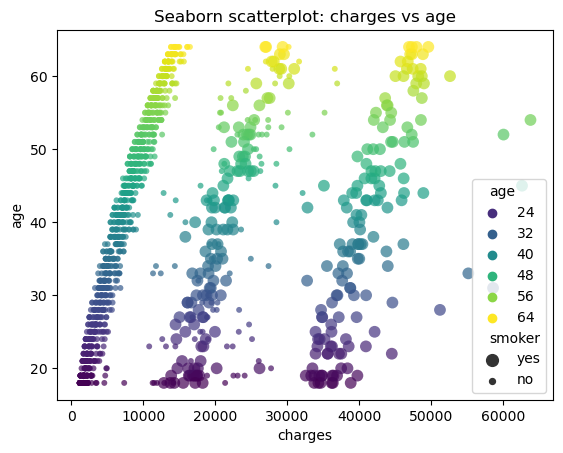

In [285]:
def graphs(df, x_axis, y_axis, type, color_axis = None): # type - select the intresting graph type. If '' - creating two graphs
    if type == 'seaborn': # seaborn
        sns.scatterplot(
            x = x_axis, 
            y = y_axis, 
            hue = y_axis, 
            palette = 'viridis',
            size = color_axis, 
            linewidth = 0,
            alpha = 0.7,
            data = df
        )
        plt.title(f"Seaborn scatterplot: {x_axis} vs {y_axis}")
        plt.show()

    elif type == 'plotly': # plotly
        fig = px.scatter(
            df, 
            x = x_axis, 
            y = y_axis, 
            color = color_axis if color_axis else y_axis,
            hover_data = df.columns,
            title=f"Plotly scatterplot: {x_axis} vs {y_axis}"
        )
        fig.show()
    else:
        sns.scatterplot(
            x = x_axis, 
            y = y_axis, 
            hue = y_axis, 
            palette = 'viridis',
            size = color_axis, 
            linewidth = 0,
            alpha = 0.7,
            data = df
        )
        plt.title(f"Seaborn scatterplot: {x_axis} vs {y_axis}")
        plt.show()

        fig = px.scatter(
            df, 
            x = x_axis, 
            y = y_axis, 
            color = color_axis if color_axis else y_axis,
            hover_data = df.columns,
            title = f"Plotly scatterplot: {x_axis} vs {y_axis}"
        )
        fig.show()
        

graphs(data, 'charges', 'age', '', 'smoker')


# The total analysis as a class

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

class InsuranceAnalyzer:
    def __init__(self, df):
        self.df = df

    # Avg age by gender
    def mean_gender_age(self, gender='both'):
        if gender == 'male':
            gender_print = 'male gender'
            avg_age = self.df[self.df['sex']=='male']['age'].mean()
        elif gender == 'female':
            gender_print = 'female gender'
            avg_age = self.df[self.df['sex']=='female']['age'].mean()
        else:
            gender_print = 'both genders'
            avg_age = self.df['age'].mean()
        return gender_print, avg_age

    # Count by gender
    def gender_count(self, gender='both'):
        if gender == 'male':
            gender_print = 'male gender'
            count = self.df[self.df['sex']=='male'].shape[0]
        elif gender == 'female':
            gender_print = 'female gender'
            count = self.df[self.df['sex']=='female'].shape[0]
        else:
            gender_print = 'both genders'
            count = self.df.shape[0]
        return gender_print, count

    # Unique regions
    def unique_regions(self):
        return self.df['region'].unique()

    # Statistics of a feature
    def gender_stats(self, gender='both', feature='charges'):
        if gender == 'male':
            gender_print = 'male gender'
            stats = self.df[self.df['sex']=='male'][feature].describe().round(3)
        elif gender == 'female':
            gender_print = 'female gender'
            stats = self.df[self.df['sex']=='female'][feature].describe().round(3)
        else:
            gender_print = 'both genders'
            stats = self.df[feature].describe().round(3)
        return gender_print, feature, stats.to_dict()

    # Graphs
    def graphs(self, x_axis, y_axis, type='', color_axis=None):
        if type == 'seaborn':
            sns.scatterplot(
                x = x_axis,
                y = y_axis,
                hue = color_axis if color_axis else y_axis,
                palette = 'viridis',
                size = color_axis,
                linewidth = 0,
                alpha = 0.7,
                data = self.df
            )
            plt.title(f"Seaborn scatterplot: {x_axis} vs {y_axis}")
            plt.show()
        elif type == 'plotly':
            fig = px.scatter(
                self.df,
                x = x_axis,
                y = y_axis,
                color = color_axis if color_axis else y_axis,
                hover_data = self.df.columns,
                title = f"Plotly scatterplot: {x_axis} vs {y_axis}"
            )
            fig.show()
        else:
            # both graphs
            sns.scatterplot(
                x = x_axis,
                y = y_axis,
                hue = y_axis,
                palette = 'viridis',
                size = color_axis,
                linewidth = 0,
                alpha = 0.7,
                data = self.df
            )
            plt.title(f"Seaborn scatterplot: {x_axis} vs {y_axis}")
            plt.show()

            fig = px.scatter(
                self.df,
                x = x_axis,
                y = y_axis,
                color = color_axis if color_axis else y_axis,
                hover_data = self.df.columns,
                title = f"Plotly scatterplot: {x_axis} vs {y_axis}"
            )
            fig.show()


Average age of male gender: 38.92
Number of female gender: 662
Regions: ['southwest' 'southeast' 'northwest' 'northeast']
female gender (charges) stats:
 {'count': 662.0, 'mean': 12569.579, 'std': 11128.704, 'min': 1607.51, '25%': 4885.159, '50%': 9412.962, '75%': 14454.692, 'max': 63770.428}


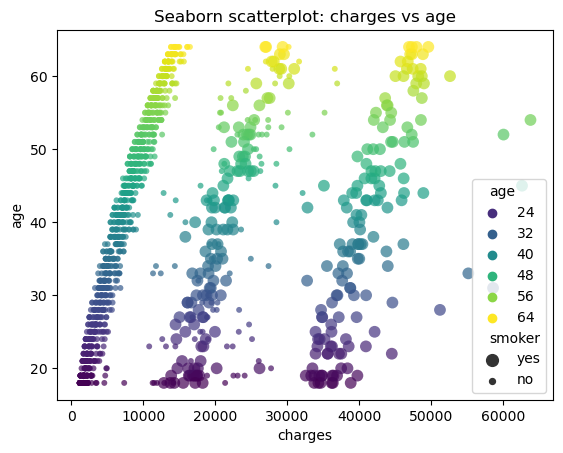

In [303]:
# Load data 
data = pd.read_csv('insurance.csv')

# Create class object
analyzer = InsuranceAnalyzer(data)

# Average age
gender_print, avg_age = analyzer.mean_gender_age('male')
print(f"Average age of {gender_print}: {avg_age:.2f}")

# Number of gender
gender_print, count = analyzer.gender_count('female')
print(f"Number of {gender_print}: {count}")

# Unique regions
print("Regions:", analyzer.unique_regions())

# Statistics
gender_print, feature, stats = analyzer.gender_stats('female', 'charges')
print(f"{gender_print} ({feature}) stats:\n",stats)

# Graphs
analyzer.graphs('charges', 'age', type='', color_axis='smoker')